#  Omkar Pawar
# Task 2: Prediction using Decision Tree  Algorithm 
Create the Decision Tree classifier and visualize it graphically. 

The purpose is if we feed any new data to this classifier, it would be able to  predict the right class accordingly.  

# Import recquired libraries

In [1]:
#import recquired libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#ignore the warnings 
import warnings as wg
wg.filterwarnings("ignore")

#sklearn 
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Load the data

In [2]:
#read dataset

df=pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [7]:
# drop id column

df=df.drop('Id',axis=1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## **Visualization**

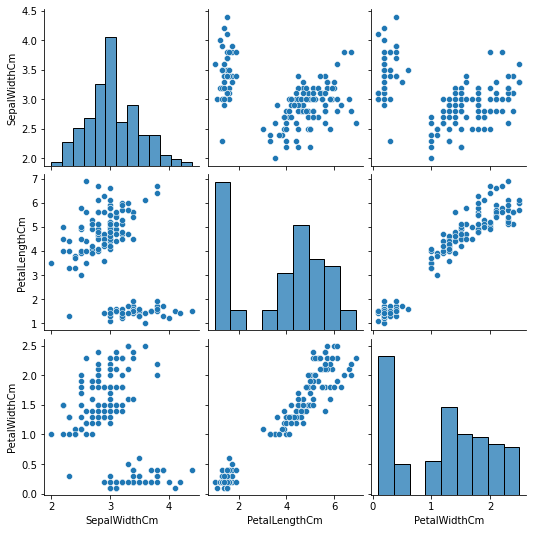

In [8]:

#Pairplot
sns.pairplot(df.iloc[:,1:]);

array([[<AxesSubplot:title={'center':'SepalLengthCm'}>,
        <AxesSubplot:title={'center':'SepalWidthCm'}>],
       [<AxesSubplot:title={'center':'PetalLengthCm'}>,
        <AxesSubplot:title={'center':'PetalWidthCm'}>]], dtype=object)

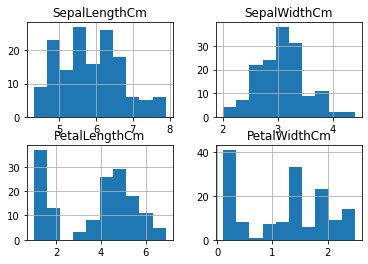

In [9]:
df.hist()

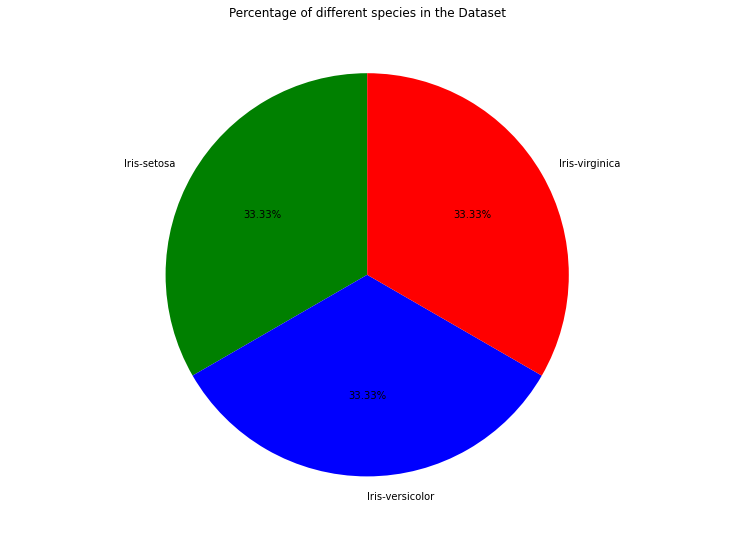

In [10]:


fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('equal')
colors = ['green','blue','red']
sp = df['Species'].unique()
ct = df['Species'].value_counts().tolist()
ax.pie(ct, labels = sp, autopct='%1.2f%%', colors=colors, startangle=90)
plt.title('Percentage of different species in the Dataset')
plt.show()

In [11]:
# Check Skewness
df.skew()

SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64

In [25]:
# Check  dublicates
df.duplicated()


0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

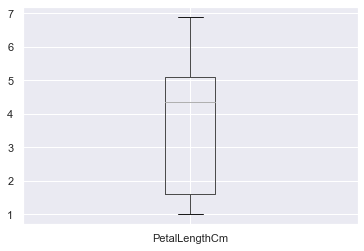

In [30]:
# Boxplot
sns.set()
df.boxplot(column='PetalLengthCm');

In [13]:
#Check Measure of dispersion
df.quantile(0.75)-df.quantile(0.25)

SepalLengthCm    1.3
SepalWidthCm     0.5
PetalLengthCm    3.5
PetalWidthCm     1.5
dtype: float64

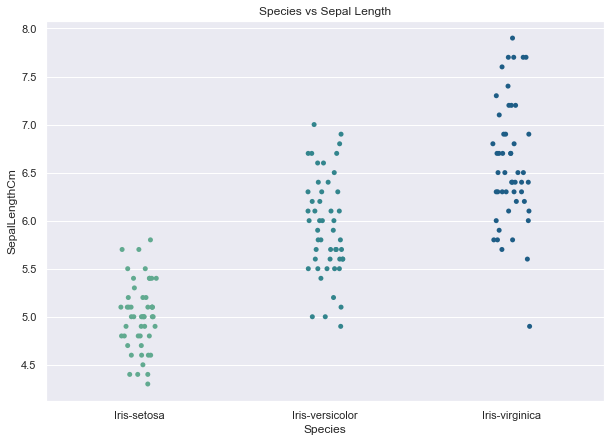

In [31]:
fig = plt.figure(figsize=(10, 7))
sns.stripplot(x='Species', y='SepalLengthCm', data=df, palette='crest')
plt.title('Species vs Sepal Length');

Text(0.5, 1.0, 'Species vs Sepal Width')

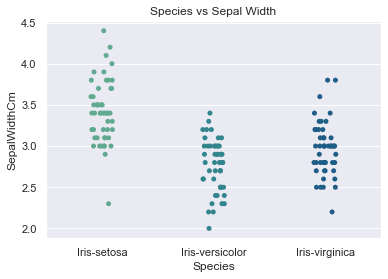

In [32]:
sns.stripplot(x='Species', y='SepalWidthCm', data=df, palette='crest')
plt.title('Species vs Sepal Width')

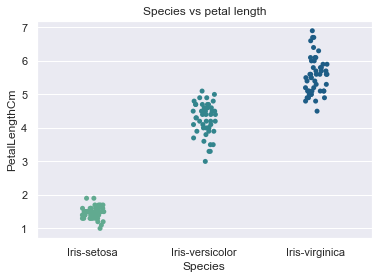

In [33]:
sns.stripplot(x='Species', y='PetalLengthCm', data=df, palette='crest')
plt.title('Species vs petal length');

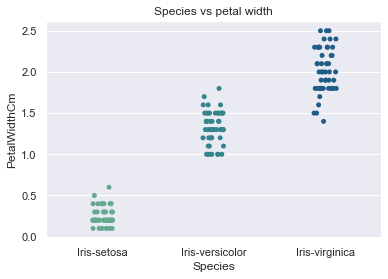

In [34]:
sns.stripplot(x='Species', y='PetalWidthCm', data=df, palette='crest')
plt.title('Species vs petal width');

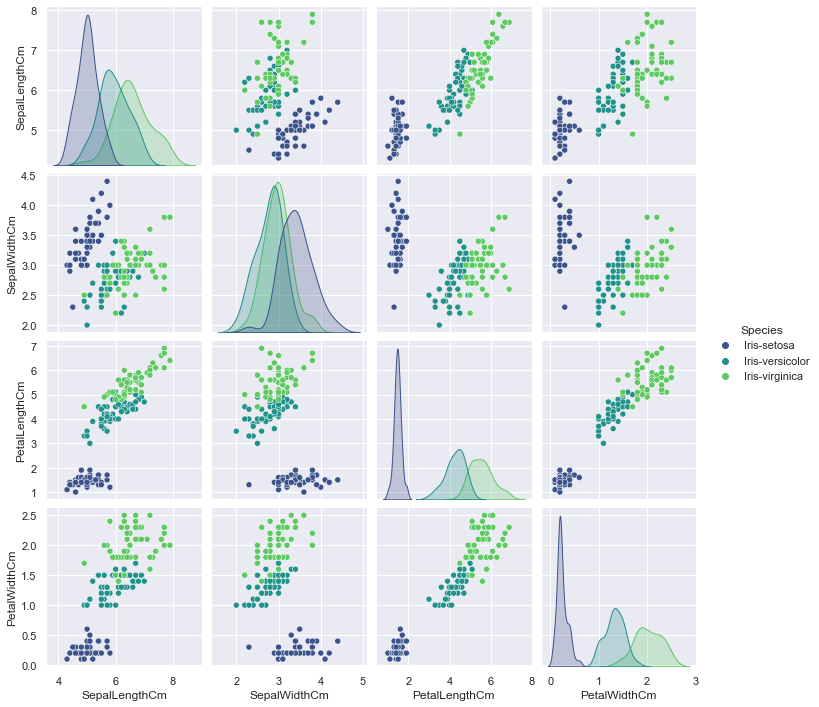

In [35]:
sns.pairplot(df, hue = 'Species',palette='viridis')
plt.show()

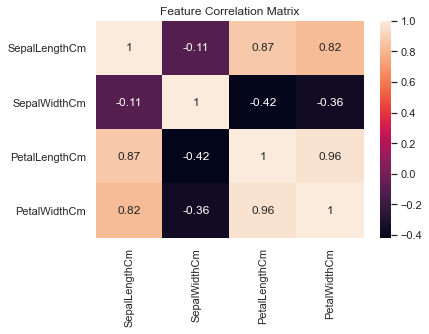

In [36]:
# plt.figure(figsize=(10,10))
matrix = df.corr()
corMat = sns.heatmap(matrix, annot=True)
corMat.set_title("Feature Correlation Matrix")
plt.show()

# Descision Tree algorithm

In [20]:
x = df.drop('Species', axis=1)
y = df['Species']

In [21]:
#train-test split

from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=1)

In [22]:
# Build Decision Tree Model

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'gini', random_state=1)
model.fit(x_train,y_train);

In [23]:
# Scorring our Decision Tree

print(model.score(x_test,y_test))

0.9666666666666667


In [24]:
y_pred = model.predict(x_test)
print(y_pred)

['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica']


In [25]:
sc = DecisionTreeClassifier(criterion="entropy", random_state=20)
sc.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=20)

In [26]:
from sklearn import metrics
y_pred1 = sc.predict(x_test)
predicted1=y_pred1
actual=y_test
score_lr= accuracy_score(y_test,y_pred1)
print("Accuracy is:\t",score_lr)
print('Recall :\t{}'.format(metrics.recall_score(y_test, y_pred1, average='macro')))
print('Precision :\t {}'.format(metrics.precision_score(y_test, y_pred1, average='macro')))
results=confusion_matrix(actual,predicted1)
print('confusion matrix: \n',results)

Accuracy is:	 0.9666666666666667
Recall :	0.9743589743589745
Precision :	 0.9523809523809524
confusion matrix: 
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


In [27]:
print('Classification Report:')
print(metrics.classification_report(y_test, y_pred1))

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [28]:
feature_names = df.columns[:4]
target_names = df['Species'].unique().tolist()
arget_names=['0','1','2']
feature_names

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

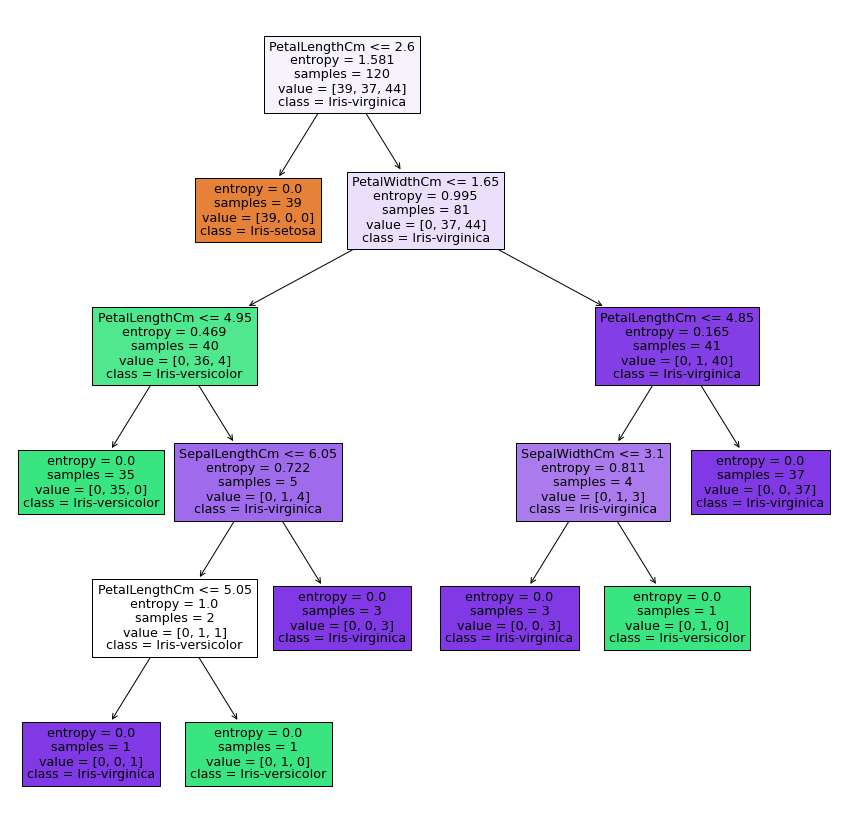

In [29]:
features = df.columns[:-1]
classes = df['Species'].unique().tolist()
from sklearn.tree import plot_tree
plt.figure(figsize=(15,15))
plot_tree(sc, feature_names=features, class_names=classes, filled=True);